In [1]:
## A project for my skill share class

In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

## Data Processing

In [28]:
# Reading the data
data = pd.read_csv('Real_estate.csv')
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [41]:
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [43]:
data.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


## Data visualization

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


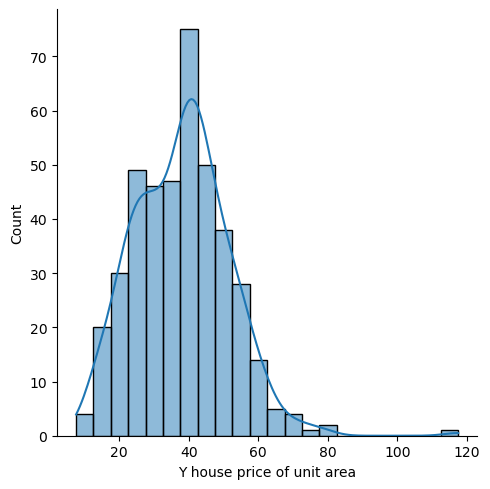

In [46]:
# Plotting the ddistribution of the Y data
sns.displot(data['Y house price of unit area'], kde=True)

<Axes: >

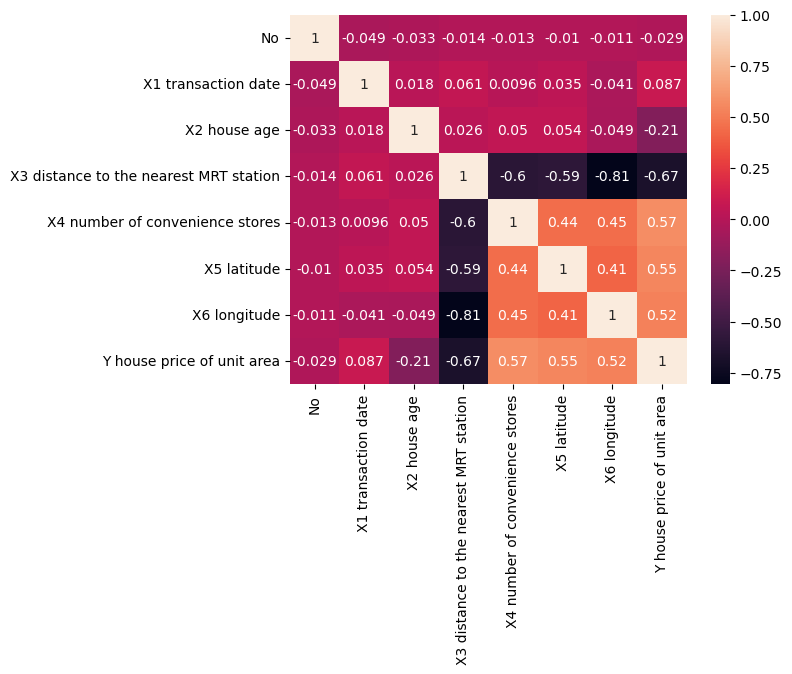

In [48]:
# features heatmap
sns.heatmap(data=data.corr(), annot=True)

## Data Pre-proccessing

In [54]:
Y = data['Y house price of unit area']
X = data.drop('Y house price of unit area', axis=1)

In [56]:
Y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y house price of unit area, dtype: float64

In [58]:
X.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245


In [60]:
# Using Variance Inflarion Factor to know which features is useful
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF results
print(vif_data.sort_values(by="VIF", ascending=False))

                                  Feature           VIF
1                     X1 transaction date  4.255150e+07
6                            X6 longitude  4.200933e+07
5                             X5 latitude  6.178420e+06
4         X4 number of convenience stores  4.750234e+00
3  X3 distance to the nearest MRT station  4.261812e+00
0                                      No  4.023678e+00
2                            X2 house age  3.474390e+00


In [62]:
# Doing a backward elimanation to automatically select the beast features to use
# but first we split the data in training and testin
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=4)

In [66]:
import statsmodels.api as sm
# Add a constant to the model (intercept)
X_train_with_const = sm.add_constant(x_train)

# Fit the model using statsmodels
model = sm.OLS(y_train, X_train_with_const).fit()

#display the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Y house price of unit area   R-squared:                       0.586
Model:                                    OLS   Adj. R-squared:                  0.577
Method:                         Least Squares   F-statistic:                     65.25
Date:                        Tue, 20 Aug 2024   Prob (F-statistic):           4.14e-58
Time:                                07:44:04   Log-Likelihood:                -1178.1
No. Observations:                         331   AIC:                             2372.
Df Residuals:                             323   BIC:                             2403.
Df Model:                                   7                                         
Covariance Type:                    nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                  -9773.7136   7490.586     -1.305      0.193   -2.45e+04    4962.782
No                                        -0.0040      0.004     -1.013      0.312      -0.012       0.004
X1 transaction date                        4.1958      1.693      2.479      0.014       0.866       7.526
X2 house age                              -0.2660      0.042     -6.324      0.000      -0.349      -0.183
X3 distance to the nearest MRT station    -0.0047      0.001     -5.993      0.000      -0.006      -0.003
X4 number of convenience stores            0.9087      0.208      4.366      0.000       0.499       1.318
X5 latitude                              221.2180     47.798      4.628      0.000     127.184     315.252
X6 longitude                             -34.1626     54.144     -0.631      0.529    -140.682      72.356
==============================================================================
Omnibus:                      220.029   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5059.704
Skew:                           2.337   Prob(JB):                         0.00
Kurtosis:                      21.575   Cond. No.                     3.85e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.85e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
# Backward elimination process
# Set a significance level (alpha) for feature removal
alpha = 0.05
# Create a list of features to consider for elimination
features = x_train.columns.tolist()

# Initialize a loop to perform backward elimination
while True:
    # Fit the model with the current set of features
    X_train_with_const = sm.add_constant(x_train[features])
    model = sm.OLS(y_train, X_train_with_const).fit()
    
    # Get the p-values of the features
    p_values = model.pvalues[1:]  # Exclude the constant term
    
    # Find the maximum p-value
    max_p_value = p_values.max()
    
    # If the maximum p-value is greater than the significance level, remove the corresponding feature
    if max_p_value > alpha:
        feature_to_remove = p_values.idxmax()  # Get the feature with the highest p-value
        features.remove(feature_to_remove)  # Remove it from the list
        print(f"Removing {feature_to_remove} with p-value {max_p_value:.4f}")
    else:
        break  # Exit the loop if all features are significant


Removing X6 longitude with p-value 0.5285
Removing No with p-value 0.3258


In [70]:
# Final model after backward elimination
X_train_final = sm.add_constant(x_train[features])
final_model = sm.OLS(y_train, X_train_final).fit()

# Display the summary of the final regression model
print("\nFinal model after backward elimination:")
print(final_model.summary())


Final model after backward elimination:
                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.584
Model:                                    OLS   Adj. R-squared:                  0.578
Method:                         Least Squares   F-statistic:                     91.26
Date:                        Tue, 20 Aug 2024   Prob (F-statistic):           8.86e-60
Time:                                07:46:51   Log-Likelihood:                -1178.8
No. Observations:                         331   AIC:                             2370.
Df Residuals:                             325   BIC:                             2392.
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [

## making a multi linear regression using the final data

In [75]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [95]:
## adding constant to the test features to match the training data
x_test_with_const = sm.add_constant(x_test)

In [109]:
# Droping some features to match the training data
#x_test_with_const = x_test_with_const.drop('No', axis=1)
x_test_with_const = x_test_with_const.drop('X6 longitude', axis=1)

In [77]:
# fitting the model
model.fit(X_train_final, y_train)

LinearRegression()

In [111]:
# droping some columns in the test data to amtch the training data columns
x_test_with_const.head()

,const,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude
339,1.0,2013.333,1.7,329.9747,5,24.98254
408,1.0,2013.417,18.5,2175.7440,3,24.96330
55,1.0,2012.833,31.7,1160.6320,0,24.94968
64,1.0,2013.333,17.5,995.7554,0,24.96305
248,1.0,2013.000,19.0,1009.2350,0,24.96357


In [93]:
X_train_final.head()

,const,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude
83,1.0,2012.917,25.3,2707.39200,3,24.96056
266,1.0,2013.250,17.8,1783.18000,3,24.96731
376,1.0,2013.417,14.7,1717.19300,2,24.96447
192,1.0,2013.167,43.8,57.58945,7,24.96750
206,1.0,2013.250,22.2,379.55750,10,24.98343


In [113]:
# Testing the model
y_pred = model.predict(x_test_with_const)

## Plotting the difference with the predicted value and the actual value

In [118]:
import matplotlib.pyplot as plt

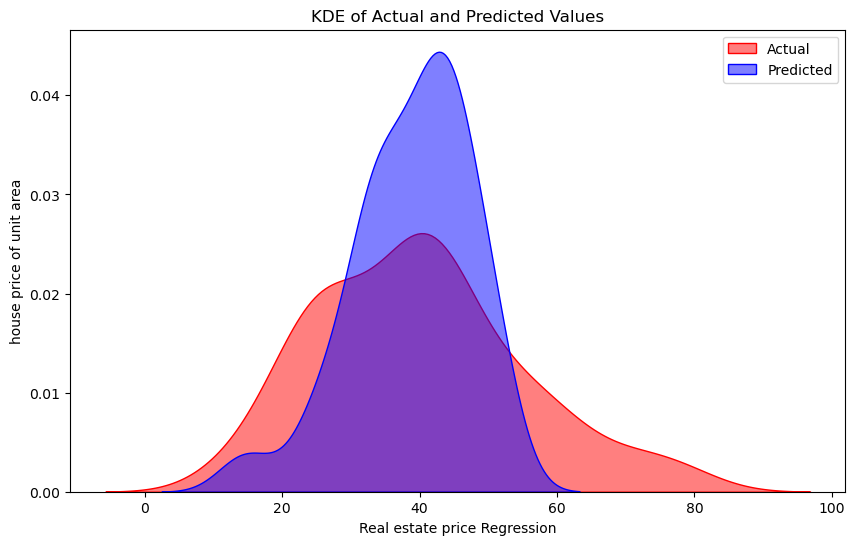

In [120]:
# Create KDE plots for actual and predicted values
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, color='red', label='Actual', fill=True, alpha=0.5)
sns.kdeplot(y_pred, color='blue', label='Predicted', fill=True, alpha=0.5)
plt.title('KDE of Actual and Predicted Values')
plt.xlabel('Real estate price Regression')
plt.ylabel('house price of unit area')
plt.legend()
plt.show()

## Model Evaluation

In [123]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R-squared: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

R-squared: 0.56
Mean Absolute Error: 7.20
Mean Squared Error: 98.04
Root Mean Squared Error: 9.90


In [127]:
from sklearn.metrics import mean_absolute_percentage_error
# Calculate Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, y_pred)
prediction_rate = 100 - (mape * 100)  # Convert to percentage

print(f"Prediction Rate: {prediction_rate:.2f}%")

Prediction Rate: 80.46%
